In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)
import datetime
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load Data
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

In [6]:
# Save original label encoders for later use with user input
merchant_categories = train_df['merchant'].unique()
transaction_categories = train_df['category'].unique()

In [7]:
def preprocess(df, le_merchant=None, le_category=None):
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['year'] = df['trans_date_trans_time'].dt.year
    df['month'] = df['trans_date_trans_time'].dt.month
    df['day'] = df['trans_date_trans_time'].dt.day
    df['hour'] = df['trans_date_trans_time'].dt.hour

    drop_cols = ['cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
                 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
                 'unix_time', 'merch_lat', 'merch_long', 'trans_date_trans_time']
    df = df.drop(columns=drop_cols)

    if le_merchant is None:
        le_merchant = LabelEncoder()
        df['merchant'] = le_merchant.fit_transform(df['merchant'])
    else:
        df['merchant'] = le_merchant.transform(df['merchant'])

    if le_category is None:
        le_category = LabelEncoder()
        df['category'] = le_category.fit_transform(df['category'])
    else:
        df['category'] = le_category.transform(df['category'])

    return df, le_merchant, le_category



In [8]:
train_df, le_merchant, le_category = preprocess(train_df)
test_df, _, _ = preprocess(test_df, le_merchant, le_category)


In [9]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']


In [10]:
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
#Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

accuracies = {}


🛠️ Training Logistic Regression...

✅ Results for Logistic Regression:
Accuracy: 99.55%

Classification Report (in %):

              precision  recall  f1-score      support
0                 99.61   99.94     99.78  55357400.00
1                  0.00    0.00      0.00    214500.00
accuracy          99.55   99.55     99.55        99.55
macro avg         49.81   49.97     49.89  55571900.00
weighted avg      99.23   99.55     99.39  55571900.00
Confusion Matrix:
 [[553224    350]
 [  2145      0]]


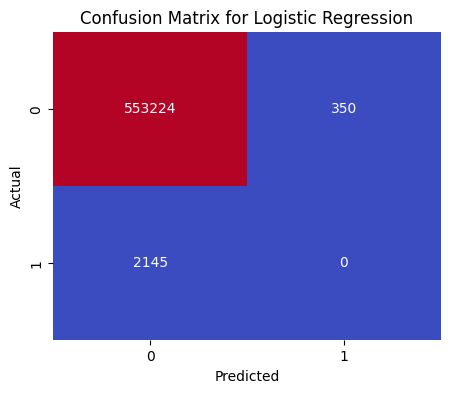


Sample transaction-wise predictions for Logistic Regression:

   Actual  Predicted  Correct
0       0          0     True
1       0          0     True
2       0          0     True
3       0          0     True
4       0          0     True
5       0          0     True
6       0          0     True
7       0          0     True
8       0          0     True
9       0          0     True

🛠️ Training Decision Tree...

✅ Results for Decision Tree:
Accuracy: 99.56%

Classification Report (in %):

              precision  recall  f1-score      support
0                 99.84   99.71     99.78  55357400.00
1                 44.81   60.00     51.31    214500.00
accuracy          99.56   99.56     99.56        99.56
macro avg         72.33   79.86     75.54  55571900.00
weighted avg      99.63   99.56     99.59  55571900.00
Confusion Matrix:
 [[551989   1585]
 [   858   1287]]


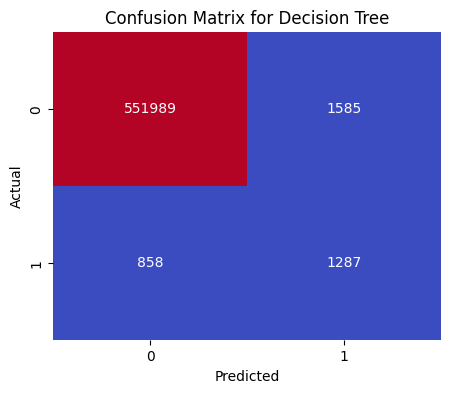


Sample transaction-wise predictions for Decision Tree:

   Actual  Predicted  Correct
0       0          0     True
1       0          0     True
2       0          0     True
3       0          0     True
4       0          0     True
5       0          0     True
6       0          0     True
7       0          0     True
8       0          0     True
9       0          0     True

🛠️ Training Random Forest...

✅ Results for Random Forest:
Accuracy: 99.82%

Classification Report (in %):

              precision  recall  f1-score      support
0                 99.86   99.97     99.91  55357400.00
1                 87.65   62.89     73.24    214500.00
accuracy          99.82   99.82     99.82        99.82
macro avg         93.76   81.43     86.57  55571900.00
weighted avg      99.81   99.82     99.81  55571900.00
Confusion Matrix:
 [[553384    190]
 [   796   1349]]


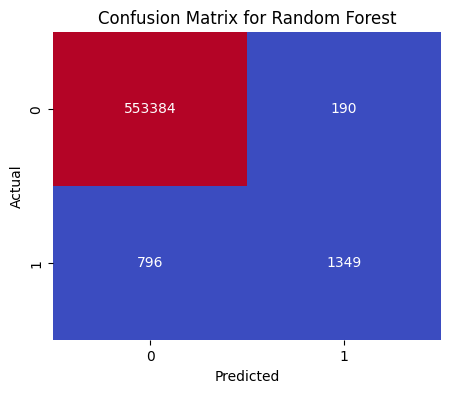


Sample transaction-wise predictions for Random Forest:

   Actual  Predicted  Correct
0       0          0     True
1       0          0     True
2       0          0     True
3       0          0     True
4       0          0     True
5       0          0     True
6       0          0     True
7       0          0     True
8       0          0     True
9       0          0     True


In [13]:
#Train, Predict, and Visualize Results
for name, model in models.items():
    print(f"\n🛠️ Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 📏 Accuracy in %
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = acc

    print(f"\n✅ Results for {name}:")
    print(f"Accuracy: {acc:.2f}%")

    # Classification Report in %
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).T * 100
    print("\nClassification Report (in %):\n")
    print(report_df.round(2))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Confusion Matrix Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Per-transaction result sample
    result_df = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': y_pred
    })
    result_df['Correct'] = result_df['Actual'] == result_df['Predicted']
    print(f"\nSample transaction-wise predictions for {name}:\n")
    print(result_df.head(10))
    result_df.to_csv(f"{name.replace(' ', '_')}_predictions.csv", index=False)

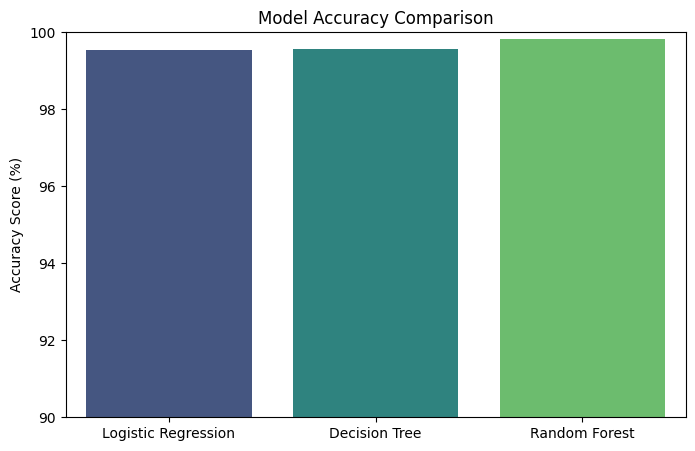

In [14]:
# Accuracy Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(90, 100)
plt.show()

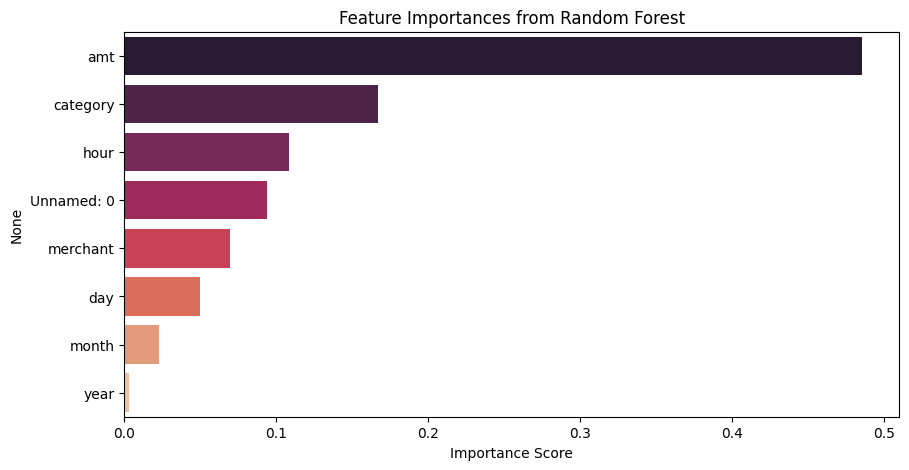

In [15]:
# Feature Importance (Random Forest)
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
features = X_train.columns
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="rocket")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [16]:
def predict_transaction(user_input, model_name="Random Forest"):

    # Create dataframe from user input
    input_df = pd.DataFrame([user_input])

    # Convert date and time string to datetime and extract components
    if 'trans_date_trans_time' in input_df.columns:
        input_df['trans_date_trans_time'] = pd.to_datetime(input_df['trans_date_trans_time'])
        input_df['year'] = input_df['trans_date_trans_time'].dt.year
        input_df['month'] = input_df['trans_date_trans_time'].dt.month
        input_df['day'] = input_df['trans_date_trans_time'].dt.day
        input_df['hour'] = input_df['trans_date_trans_time'].dt.hour
        input_df = input_df.drop('trans_date_trans_time', axis=1)

    # Label encode merchant and category
    if 'merchant' in input_df.columns:
        # Map the merchant to its numeric encoding
        try:
            input_df['merchant'] = le_merchant.transform([input_df['merchant'].iloc[0]])[0]
        except:
            # If merchant not in training data, use a fallback value
            input_df['merchant'] = 0  # using 0 as default

    if 'category' in input_df.columns:
        # Map the category to its numeric encoding
        try:
            input_df['category'] = le_category.transform([input_df['category'].iloc[0]])[0]
        except:
            # If category not in training data, use a fallback value
            input_df['category'] = 0  # using 0 as default

    # Ensure the input has the same features as the training data
    for col in X_train.columns:
        if col not in input_df.columns:
            input_df[col] = 0  # Add missing columns with default values

    # Remove any extra columns
    input_df = input_df[X_train.columns]

    # Scale the input features
    input_scaled = scaler.transform(input_df)

    model = models[model_name]
    prediction = model.predict(input_scaled)[0]

    # For models that support probability estimates
    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(input_scaled)[0]
        confidence = probabilities[1] if prediction == 1 else probabilities[0]
        confidence_pct = round(confidence * 100, 2)
    else:
        confidence_pct = "N/A"

    result = "FRAUDULENT 🚨" if prediction == 1 else "LEGITIMATE ✅"

    return f"Transaction is: {result} (Confidence: {confidence_pct}%)"

In [18]:
def get_user_input():
    print("\n🔍 CREDIT CARD FRAUD DETECTION - TRANSACTION CHECKER")
    print("================================================")
    print("\nPlease enter the transaction details:")

    # Get current date and time as default
    current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Basic transaction info
    amt = float(input("Transaction amount ($): "))

    # Get merchant information
    print("\nMerchant list (examples from our dataset):")
    sample_merchants = np.random.choice(merchant_categories, size=min(5, len(merchant_categories)), replace=False)
    for i, m in enumerate(sample_merchants, 1):
        print(f"{i}. {m}")
    merchant = input("Enter merchant name (can be from the list above or another): ")

    # Get category information
    print("\nCategory list (examples from our dataset):")
    sample_categories = np.random.choice(transaction_categories, size=min(5, len(transaction_categories)), replace=False)
    for i, c in enumerate(sample_categories, 1):
        print(f"{i}. {c}")
    category = input("Enter transaction category (can be from the list above or another): ")

    # Get date and time (default to current)
    date_time = input(f"Enter transaction date and time (YYYY-MM-DD HH:MM:SS) [default: {current_datetime}]: ")
    if not date_time:
        date_time = current_datetime

    # Advanced options
    print("\nAdvanced Options:")
    model_choice = input("Select model (Logistic Regression, Decision Tree, Random Forest) [default: Random Forest]: ")
    if not model_choice or model_choice not in models:
        model_choice = "Random Forest"

    # input dictionary
    user_input = {
        'amt': amt,
        'merchant': merchant,
        'category': category,
        'trans_date_trans_time': date_time,
    }

    return user_input, model_choice

# Main execution function for user input prediction
def check_transaction():
    while True:
        user_input, model_choice = get_user_input()
        result = predict_transaction(user_input, model_choice)

        print("\n📊 PREDICTION RESULT:")
        print("===================")
        print(result)

        # Details about the transaction
        print("\nTransaction Details:")
        print(f"- Amount: ${user_input['amt']}")
        print(f"- Merchant: {user_input['merchant']}")
        print(f"- Category: {user_input['category']}")
        print(f"- Date/Time: {user_input['trans_date_trans_time']}")
        print(f"- Model Used: {model_choice}")

        another = input("\nCheck another transaction? (y/n): ")
        if another.lower() != 'y':
            break

if __name__ == "__main__":
    print("\n✅ Models trained successfully!")
    print("Random Forest had the highest accuracy at {:.2f}%".format(accuracies.get("Random Forest", 0)))

    check_input = input("\nWould you like to check a transaction? (y/n): ")
    if check_input.lower() == 'y':
        check_transaction()
    else:
        print("Thank you for using the Credit Card Fraud Detection System!")


✅ Models trained successfully!
Random Forest had the highest accuracy at 99.82%

Would you like to check a transaction? (y/n): y

🔍 CREDIT CARD FRAUD DETECTION - TRANSACTION CHECKER

Please enter the transaction details:
Transaction amount ($): 1000

Merchant list (examples from our dataset):
1. fraud_Kuphal-Predovic
2. fraud_Parisian and Sons
3. fraud_Ruecker Group
4. fraud_Kutch, Hermiston and Farrell
5. fraud_Stark-Koss
Enter merchant name (can be from the list above or another): kiran

Category list (examples from our dataset):
1. misc_pos
2. kids_pets
3. personal_care
4. home
5. travel
Enter transaction category (can be from the list above or another): travel
Enter transaction date and time (YYYY-MM-DD HH:MM:SS) [default: 2025-05-05 13:44:15]: 

Advanced Options:
Select model (Logistic Regression, Decision Tree, Random Forest) [default: Random Forest]: 

📊 PREDICTION RESULT:
Transaction is: LEGITIMATE ✅ (Confidence: 80.0%)

Transaction Details:
- Amount: $1000.0
- Merchant: kiran